# Importing Libraries and Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data using pandas
data = pd.read_csv("Linear Regression - sheet1.csv")

In [3]:
data.describe()

,X,Y
count,300.000000,300.000000
mean,150.500000,103.548889
std,86.746758,57.819733
min,1.000000,3.888889
25%,75.750000,53.722222
50%,150.500000,103.555556
75%,225.250000,153.388889
max,300.000000,201.888889


In [4]:
data.tail()

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,201.888889
299,300,201.888889


In [5]:
data.shape

(300, 2)

Let's see the correlation between the parameters we have.

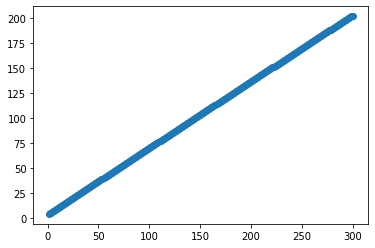

In [6]:
# PLotting the parameters
plt.scatter(data['X'],data['Y'])

We need to convert our data into arrays for easier matrix calculation 

In [7]:
x_data = data.drop('Y',axis=1)
x_data = np.array(x_data)
x_data = x_data.reshape(-1,1)

In [8]:
ones = np.ones([x_data.shape[0], 1])

In [9]:
X = np.concatenate([ones, x_data],1)

In [10]:
X.shape

(300, 2)

In [11]:
y_data = data.drop('X',axis =1)
y_data = np.array(y_data)
Y = y_data.reshape(-1,1)

In [12]:
Y.shape

(300, 1)

Now let's get down to the main business.

## Method 1 - Using Gradient Descent

In [13]:
# Method 1
# notice small alpha value
alpha = 0.00001
iters = 50000

theta = np.array([[1.0, 1.0]])
theta.shape

(1, 2)

In [14]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [15]:
computeCost(X, Y,theta)

1566.651727971186

In [16]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [17]:
g, cost = gradientDescent(X, Y, theta, alpha, iters)  
print(g, cost)

[[1.26002162 0.67639517]] 0.4890002779756274


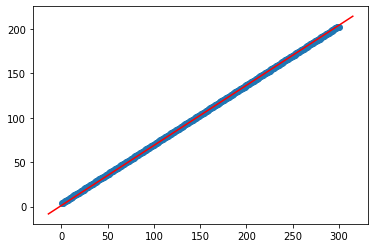

In [18]:
# Plotting scatter points
plt.scatter(data['X'],data['Y'], label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')

The cost function was reduced to approximately 0.5 after 50,000 iteration with a learning rate of 0.00001 which is good but will consume large memory and time if the datset is large.

Learning rate here is 10^(-5) which is really small. Generally, we take this value 0.001-0.03.

50,000 iterations is also not good as we want our model to reach the global minimum faster and efficiently.

Taking more iteration in the above example will give us a much lesser value of the cost function.

For iteration 10 lakhs, the cost function was approximately 0.01

## Method 2 - Using Ordinary Least Mean Square Method

In [19]:
# Method 2
x_mean = np.mean(x_data)
y_mean = np.mean(Y)

In [20]:
numerator = 0
denominator = 0

In [21]:
for i in range(len(X)):
    numerator += (x_data[i] - x_mean) * (Y[i] - y_mean)
    denominator += (x_data[i] - x_mean) ** 2

In [22]:
theta1 = numerator/denominator
theta0 = y_mean - (theta1 * x_mean)

In [23]:
# Plotting Values and Regression Line
max_x = np.max(X) + 10
min_x = np.min(X) - 10

In [24]:
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = theta0 + theta1 * x 

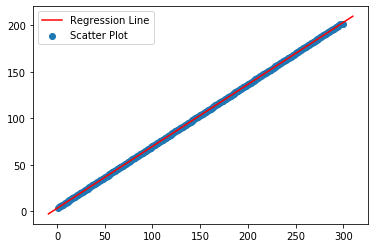

In [25]:
# Ploting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x_data, Y, label='Scatter Plot')
plt.legend()
plt.show()

We need to able to measure how good our model is (accuracy). There are many methods to achieve this but we would implement Root mean squared error and coefficient of Determination (R² Score).

In [26]:
#Root Mean Squared Error

rmse = 0
for i in range(len(x_data)):
    y_pred=  theta0 + theta1* x_data[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/len(x_data))
print(rmse)

[0.08503591]


In [27]:
# R² Score
sumofsquares = 0
sumofresiduals = 0
for i in range(len(x_data)) :
    y_pred = theta0 + theta1 * x_data[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.99999783]


0.99 is pretty high and we can see from the graph too how well the line fits the data points

#### Conclusion of the comparison of the two methods - 
Gradient descent method will consume more the than the other one as we have iterate thousands of times to get the Globla Minima.

### Here are some key terms we learned —

**Simple linear regression** — Finds the relationship between two variables that are linearly correlated. E.g. finding the relationship between the size of a house and the price of a house

**Linear relationship** — When you plot the dataset on a graph, the data lies approximately in the shape of a straight line.

**Linear equation** — y = mx +b. The standard form that represents a straight line on a graph, where m represents the gradient, and b represents the y-intercept.

**Gradient** — How steep the line is

**Y-intercept** — Where the line crosses the y-axis

**Cost function** — Calculates the total error of your line

**Minimizing the cost function** — Reducing the value of the cost function until the error is minimized.

**Learning rate (alpha (α))** — A small number that allows the parameters to be updated by a tiny amount.